#                                            Pattern Recognision Assignment 1





In this assignment we must implement a Bayesian Classifier that decides if a patient is possibly endangered from cancer. After training the classifier, we have acquired probability density $p(\textbf{x}|ω_1)$ being the  ddistribution of state $ω_1$ (healthy 

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from scipy.stats import multivariate_normal, norm

In [62]:
mu_class_healthy = np.array([0.4, 0.8])
mu_class_cancer = np.array([1.5, 2.7])
P_omega1 = 0.95
P_omega2 = 0.05

#uncomment 3 lines to Run for partA
#part = 'part A'
#covariance_matrix1 = np.array([[1.5, 0],[0, 0.8]])
#covariance_matrix2 = np.array([[1.5, 0],[0, 0.8]])
#uncomment 3 lines to Run for partB
part = 'part B'
covariance_matrix1 = np.array([[1.5, 0],[0, 0.8]])
covariance_matrix2 = np.array([[1.5/4, 0],[0, 0.8/4]])

Px_omega1 = multivariate_normal(mu_class_healthy , covariance_matrix1)
Px_omega2 = multivariate_normal(mu_class_cancer , covariance_matrix2)

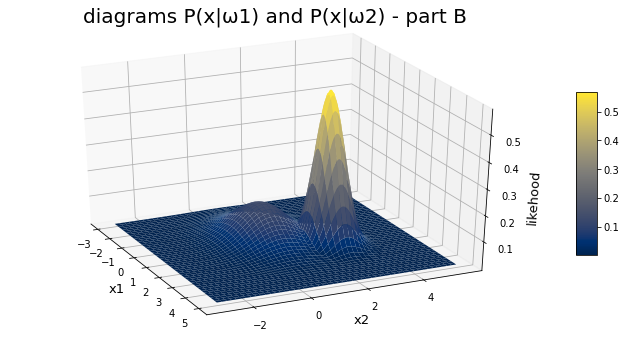

In [63]:
"""----------------------------------3D PLOT------------------------------------"""
x = np.linspace(-3,5,1000)
y = np.linspace(-3,5.5,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
#Make a 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, np.where(Px_omega1.pdf(pos) > Px_omega2.pdf(pos), Px_omega1.pdf(pos), Px_omega2.pdf(pos)),cmap='cividis',linewidth=0.2)

ax.set_xlabel('x1', fontsize=13)
ax.set_ylabel('x2', fontsize=13)
ax.set_zlabel('likehood', fontsize=13)
ax.set_title(label ='diagrams P(x|\u03C91) and P(x|\u03C92) - ' + part,fontsize=20,pad=15.0)
ax.view_init(30, -25)
fig.colorbar(surf, ax = ax,shrink = 0.5, aspect = 8)
# plt.xlim([-2, 2])
# plt.ylim([-2, 2])
plt.show()


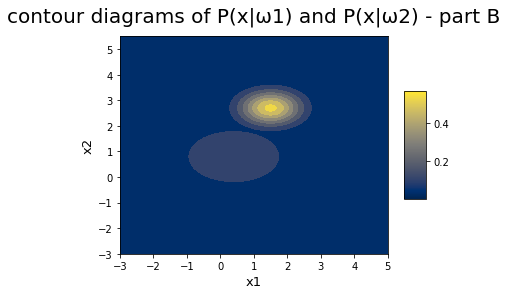

In [64]:
"""----------------------------------CONTOUR------------------------------------"""
x = np.linspace(-3,5,1000)
y = np.linspace(-3,5.5,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

#Make contour plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X, Y, np.where(Px_omega1.pdf(pos) > Px_omega2.pdf(pos), Px_omega1.pdf(pos), Px_omega2.pdf(pos)),cmap='cividis')
fig.colorbar(surf, ax = ax,shrink = 0.5, aspect = 5)

ax.set_xlabel('x1', fontsize=13)
ax.set_ylabel('x2', fontsize=13)
ax.set_title(label ='contour diagrams of P(x|\u03C91) and P(x|\u03C92) - ' + part,fontsize=20,pad=15.0)

plt.show()

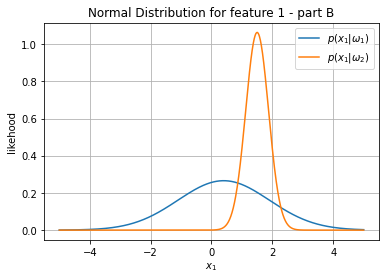

In [67]:
x = np.linspace(-5,5,1000)
plt.plot(x, norm.pdf(x, mu_class_healthy[0] , covariance_matrix1[0,0]),label = r'$p(x_1|\omega_1)$')

plt.plot(x, norm.pdf(x, mu_class_cancer[0] , covariance_matrix2[0,0]), label = r'$p(x_1|\omega_2)$')
plt.grid()
plt.title('Normal Distribution for feature 1 - ' + part)
plt.xlabel('$x_1$')
plt.ylabel('likehood')
plt.legend()
plt.show()

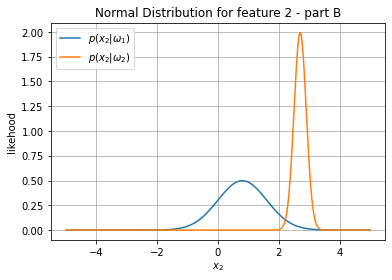

In [68]:
x = np.linspace(-5,5,1000)
rv1 = norm(mu_class_healthy[1] , covariance_matrix1[1,1])
rv2 = norm(mu_class_cancer[1] , covariance_matrix2[1,1])
plt.plot(x, norm.pdf(x, mu_class_healthy[1] , covariance_matrix1[1,1]),label = r'$p(x_2|\omega_1)$')
plt.plot(x, norm.pdf(x, mu_class_cancer[1] , covariance_matrix2[1,1]), label = r'$p(x_2|\omega_2)$')
plt.grid()
plt.title('Normal Distribution for feature 2 - ' +part)
plt.xlabel('$x_2$')
plt.ylabel('likehood')
plt.legend()
plt.show()

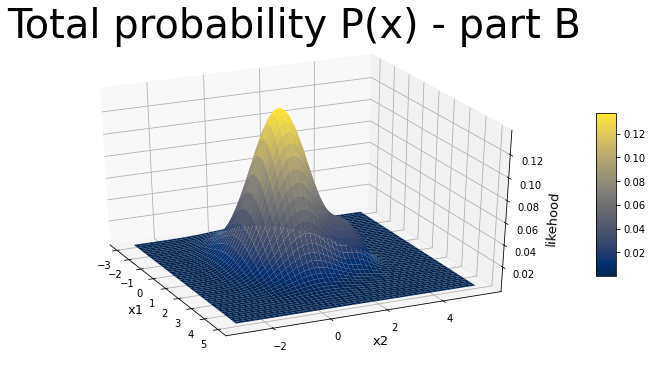

In [69]:
"""----------------------------------3D PLOT OF TOTAL PROBABILITY------------------------------------"""
x = np.linspace(-3,5,1000)
y = np.linspace(-3,5.5,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

totalProbability = Px_omega1.pdf(pos) * P_omega1 + Px_omega2.pdf(pos) * P_omega2

#Make a 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, totalProbability,cmap='cividis',linewidth=0.2)

ax.set_xlabel('x1', fontsize=13)
ax.set_ylabel('x2', fontsize=13)
ax.set_zlabel('likehood', fontsize=13)
ax.set_title(label ='Total probability P(x) - ' + part,fontsize=40,pad=20.0)
ax.view_init(30, -25)
fig.colorbar(surf, ax = ax,shrink = 0.5, aspect = 8)
# plt.xlim([-2, 2])
# plt.ylim([-2, 2])
plt.show()

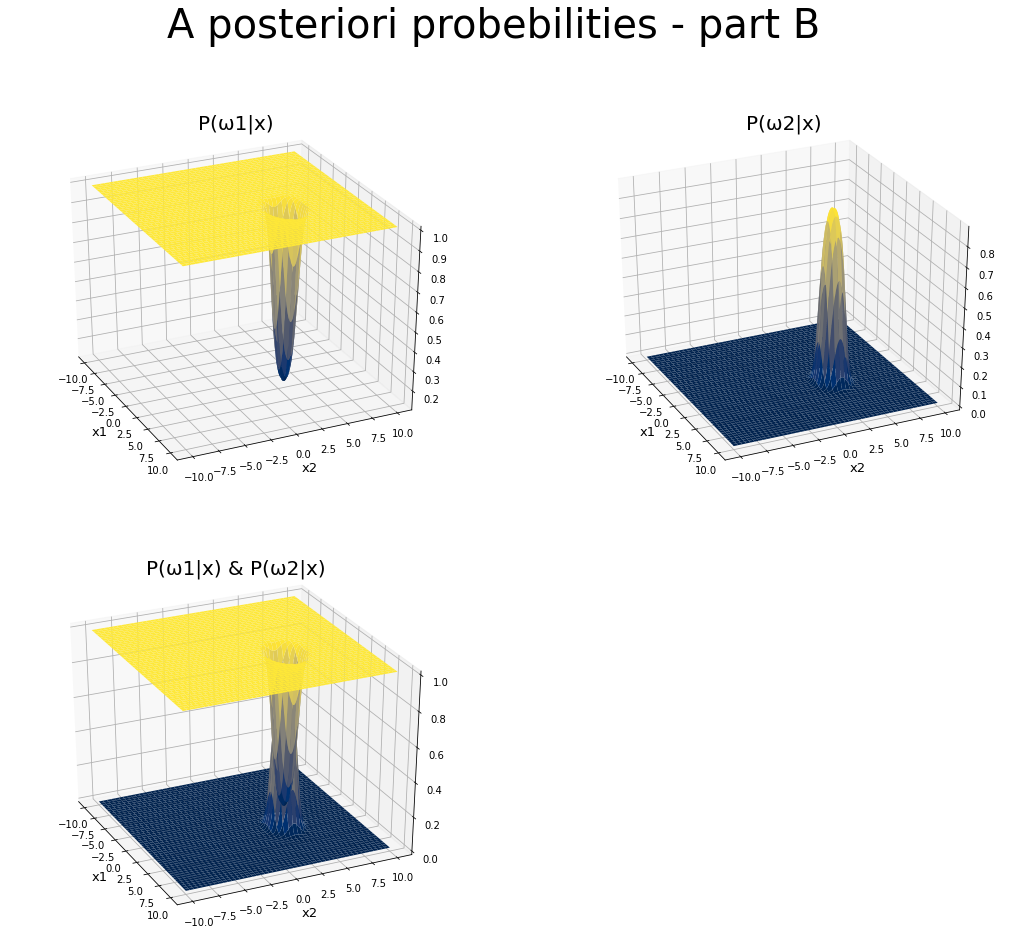

In [70]:
"""----------------------------------3D PLOT OF A POSTERIORI PROBABILITIES ------------------------------------"""
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

totalProbability = Px_omega1.pdf(pos) * P_omega1 + Px_omega2.pdf(pos) * P_omega2

#calculate a posteriori probabilities for the two categories
Pomega1_x = (Px_omega1.pdf(pos) * P_omega1) / totalProbability
Pomega2_x = (Px_omega2.pdf(pos) * P_omega2) / totalProbability

#create the 3D plots
fig = plt.figure(figsize = (18,15))
fig.suptitle("A posteriori probebilities - " + part,fontsize=40)

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')

ax1.plot_surface(X, Y, Pomega1_x,cmap='cividis',linewidth=0)
ax1.set_xlabel('x1', fontsize=13)
ax1.set_ylabel('x2', fontsize=13)
ax1.set_title(label ='P(\u03C91|x)',fontsize=20,pad=15.0)
ax1.view_init(30, -25)

ax2.plot_surface(X, Y, Pomega2_x,cmap='cividis',linewidth=0)
ax2.set_xlabel('x1', fontsize=13)
ax2.set_ylabel('x2', fontsize=13)
ax2.set_title(label ='P(\u03C92|x)',fontsize=20,pad=15.0)
ax2.view_init(30, -25)

ax3.plot_surface(X, Y, Pomega1_x,cmap='cividis',linewidth=0)
ax3.plot_surface(X, Y, Pomega2_x,cmap='cividis',linewidth=0)
ax3.set_xlabel('x1', fontsize=13)
ax3.set_ylabel('x2', fontsize=13)
ax3.set_title(label ='P(\u03C91|x) & P(\u03C92|x)',fontsize=20,pad=15.0)
ax3.view_init(30, -25)

plt.show()

In [71]:
#Calculate Bayesian error
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

totalProbability = Px_omega1.pdf(pos) * P_omega1 + Px_omega2.pdf(pos) * P_omega2

#calculate a posteriori probabilities for the two categories
Pomega1_x = (Px_omega1.pdf(pos) * P_omega1) / totalProbability
Pomega2_x = (Px_omega2.pdf(pos) * P_omega2) / totalProbability

error = 0

for i in range(0,1000):
  for j in range(0,1000):
    if Pomega1_x[i][j] > Pomega2_x[i][j]:
      error = error + Px_omega2.pdf(pos[i,j,:]) * P_omega2 *0.0004
    if Pomega2_x[i][j] >= Pomega1_x[i][j]:
      error = error + Px_omega1.pdf(pos[i,j,:]) * P_omega1 * 0.0004
      
print("Bayesian error for " + part + " is:" ,error)

Bayesian error for part B is: 0.028971741016928437
